In [4]:
# Данные тут
# статья https://statmodeling.stat.columbia.edu/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/



import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime

In [31]:
# Скачать данные.
# Важно! Внимательнее с индексами!

df = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv')
df

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0
3,11/01/2019 03:00:00 AM,6.0,6.0,0.0
4,11/01/2019 04:00:00 AM,6.0,5.0,1.0
...,...,...,...,...
149433,03/31/2022 07:00:00 PM,136.0,45.0,91.0
149434,03/31/2022 08:00:00 PM,94.0,35.0,59.0
149435,03/31/2022 09:00:00 PM,48.0,26.0,22.0
149436,03/31/2022 10:00:00 PM,33.0,15.0,18.0


In [15]:
df.head()
df.shape[0]-df[df.Date.duplicated()].shape[0]



83184

In [25]:
df_fixed = df.drop_duplicates()
df_fixed.shape

(83185, 4)

In [26]:
df_fixed = df_fixed.set_index(pd.to_datetime(df_fixed.Date)).drop(columns = 'Date')

In [27]:
df_fixed.index.is_unique

False

In [42]:
df_fixed[~df_fixed.index.duplicated()]

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2022-03-31 19:00:00,136.0,45.0,91.0
2022-03-31 20:00:00,94.0,35.0,59.0
2022-03-31 21:00:00,48.0,26.0,22.0


In [32]:

df_fixed.loc['2020-03-08']
df_fixed.sort_index(inplace = True)


In [39]:
df_docov = df_fixed.truncate(after = '2019-12-31 23:0000')
df_docov

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2019-12-31 19:00:00,19.0,8.0,11.0
2019-12-31 20:00:00,13.0,6.0,7.0
2019-12-31 21:00:00,15.0,8.0,7.0


In [3]:
# Работаем с 2021 (пандемия)

In [44]:
df_docov.loc[df_docov.isnull().any(axis = 1)]

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2013-06-14 09:00:00,NaN,NaN,NaN
2013-06-14 10:00:00,NaN,NaN,NaN
2014-03-09 02:00:00,NaN,NaN,NaN
2015-03-08 02:00:00,NaN,NaN,NaN
2015-04-21 11:00:00,NaN,NaN,NaN
2015-04-21 12:00:00,NaN,NaN,NaN
2016-03-13 02:00:00,NaN,NaN,NaN
2017-03-12 02:00:00,NaN,NaN,NaN
2018-03-11 02:00:00,NaN,NaN,NaN


In [4]:
# Ищем пропуски и заполняем их

In [43]:
df_docov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63504 entries, 2012-10-03 00:00:00 to 2019-12-31 23:00:00
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Fremont Bridge Total          63494 non-null  float64
 1   Fremont Bridge East Sidewalk  63494 non-null  float64
 2   Fremont Bridge West Sidewalk  63494 non-null  float64
dtypes: float64(3)
memory usage: 1.9 MB


In [45]:
df_cov_fix = df_docov.interpolate(method = 'linear', axis = 0)
df_cov_fix.loc['2013-06-14']

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2013-06-14 00:00:00,16.000000,5.0,11.000000
2013-06-14 01:00:00,14.000000,7.0,7.000000
2013-06-14 02:00:00,1.000000,1.0,0.000000
2013-06-14 03:00:00,6.000000,5.0,1.000000
2013-06-14 04:00:00,33.000000,20.0,13.000000
2013-06-14 05:00:00,154.000000,103.0,51.000000
2013-06-14 06:00:00,314.000000,225.0,89.000000
2013-06-14 07:00:00,417.000000,305.0,112.000000
2013-06-14 08:00:00,254.000000,160.0,94.000000


In [5]:
# визуализируем все данные по каждому направлению и суммарно

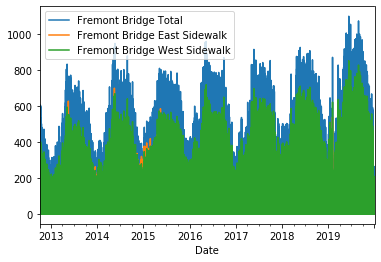

In [46]:
df_cov_fix.plot()

In [6]:
# выводим две недели для дальнейшего анализа

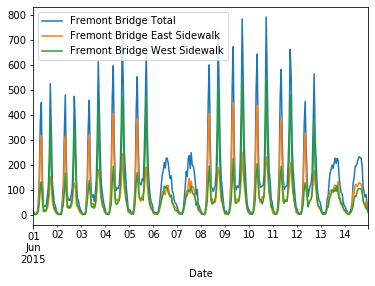

In [49]:
df_cov_fix.loc['2015-06-01' : '2015-06-14'].plot()

In [7]:
# сглаживание с переносом результата в середину выборки (смотрим разные варианты)

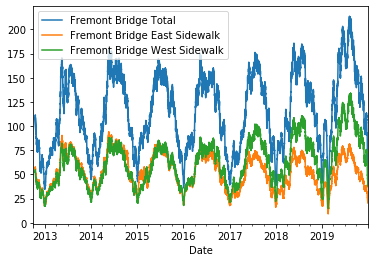

In [50]:
df_cov_fix.rolling(365).mean().plot()

In [64]:
# анализируем почасовые тенденции

df_cov_fix.index

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

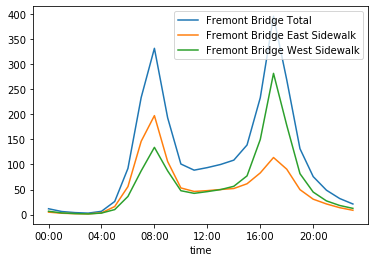

In [68]:

df_day = df_cov_fix.groupby(df_cov_fix.index.time).mean()
hour_ticks = df_day.index.values[::4]

g = df_day.plot()
g.set_xticks(hour_ticks);


In [ ]:
# анализируем недельные тенденции

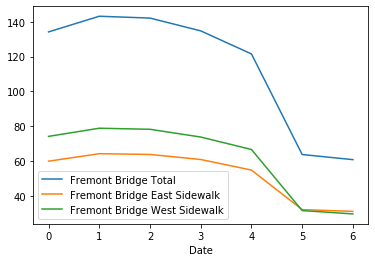

In [73]:
df_week = df_cov_fix.groupby(df_cov_fix.index.dayofweek).mean()
week_ticks = df_week.index.values

g = df_week.plot()


In [83]:
day_of_week = ['ПН', 'ВТ', 'СР', 'ЧТ', 'ПТ', 'СБ', 'ВС']

day_type = np.where(df_cov_fix.index.dayofweek < 5, 'workday', 'weekend')
day_an = df_cov_fix.groupby([day_type, df_cov_fix.index.dayofweek]).mean()
day_an


Fremont Bridge Total  Fremont Bridge East Sidewalk  \
        Date                                                       
weekend 5                63.766975                     32.163801   
        6                60.837081                     31.145833   
workday 0               134.126213                     59.946869   
        1               143.120370                     64.251323   
        2               142.068122                     63.819444   
        3               134.727072                     60.921407   
        4               121.493056                     54.844687   

              Fremont Bridge West Sidewalk  
        Date                                
weekend 5                        31.603175  
        6                        29.691248  
workday 0                        74.179343  
        1                        78.869048  
        2                        78.248677  
        3                        73.805666  
        4                        66.648369

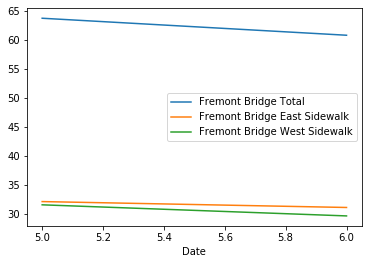

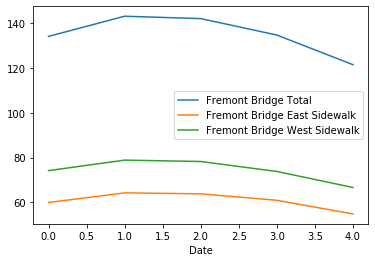

In [82]:
day_an.loc['weekend'].plot()
day_an.loc['workday'].plot()


In [ ]:
# снова анализируем недельные тенденции с учетом дней недели

In [ ]:
# анализируем почасовые тенденции с разбросом данных используюя sns.lineplot

In [88]:
df_sns = df_cov_fix.copy()

df_sns['day'] = np.where(df_cov_fix.index.dayofweek < 5, 'workday', 'weekend')
df_sns['time'] = df_sns.index.time
df_sns['month'] = df_sns.index.month
df_sns

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,day,time,month
Date,,,,,,
2012-10-03 00:00:00,13.0,4.0,9.0,workday,00:00:00,10
2012-10-03 01:00:00,10.0,4.0,6.0,workday,01:00:00,10
2012-10-03 02:00:00,2.0,1.0,1.0,workday,02:00:00,10
2012-10-03 03:00:00,5.0,2.0,3.0,workday,03:00:00,10
2012-10-03 04:00:00,7.0,6.0,1.0,workday,04:00:00,10
...,...,...,...,...,...,...
2019-12-31 19:00:00,19.0,8.0,11.0,workday,19:00:00,12
2019-12-31 20:00:00,13.0,6.0,7.0,workday,20:00:00,12
2019-12-31 21:00:00,15.0,8.0,7.0,workday,21:00:00,12


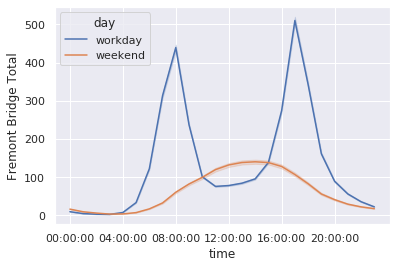

In [97]:
sns.set()
sns.lineplot(x = df_sns.time.astype(str), y = df_sns['Fremont Bridge Total'], hue = df_sns.day)
plt.xticks(hour_ticks.astype(str));